# Exploratory Data Analysis

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
data=pd.read_csv("data_clean.csv") 
data

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67,5,1,2010,67,C
154,155,30.0,193.0,6.9,70,9,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9,27,2010,77,S
156,157,14.0,191.0,14.3,75,9,28,2010,75,S


In [26]:
data=pd.read_csv("data_clean.csv",index_col=0)  #index_col=0 means col 0 consider as index col
data

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67,5,1,2010,67,S
2,36.0,118.0,8.0,72,5,2,2010,72,C
3,12.0,149.0,12.6,74,5,3,2010,74,PS
4,18.0,313.0,11.5,62,5,4,2010,62,S
5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
154,41.0,190.0,7.4,67,5,1,2010,67,C
155,30.0,193.0,6.9,70,9,26,2010,70,PS
156,NaN,145.0,13.2,77,9,27,2010,77,S
157,14.0,191.0,14.3,75,9,28,2010,75,S


In [27]:
data.shape


(158, 9)

In [28]:
data.head(10)

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67,5,1,2010,67,S
2,36.0,118.0,8.0,72,5,2,2010,72,C
3,12.0,149.0,12.6,74,5,3,2010,74,PS
4,18.0,313.0,11.5,62,5,4,2010,62,S
5,NaN,NaN,14.3,56,5,5,2010,56,S
6,28.0,NaN,14.9,66,5,6,2010,66,C
7,23.0,299.0,8.6,65,5,7,2010,65,PS
8,19.0,99.0,13.8,59,5,8,2010,59,C
9,8.0,19.0,20.1,61,5,9,2010,61,PS
10,NaN,194.0,8.6,69,5,10,2010,69,S


In [29]:
data.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Temp C      object
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Temp C   158 non-null    object 
 4   Month    158 non-null    object 
 5   Day      158 non-null    int64  
 6   Year     158 non-null    int64  
 7   Temp     158 non-null    int64  
 8   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 12.3+ KB


In [31]:
data.isna().sum()

Ozone      38
Solar.R     7
Wind        0
Temp C      0
Month       0
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [32]:
data.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Temp C      object
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

# data type conversion  (object to int or float)

## method -01 : astype() method:
The astype() method is a simple and common way to convert the datatype of a Pandas Series. It works well when all the values in the column can be safely converted to integers.

### Assuming df is your DataFrame and 'column_name' is the column you want to convert
df['column_name'] = df['column_name'].astype(int)


## method -2 : to_numeric() method:
The to_numeric() method is useful when you want to handle non-numeric values by either coercing them to NaN or using a specific error-handling strategy.


#### df['column_name'] = pd.to_numeric(df['column_name'], errors='coerce').astype('Int64')

The errors='coerce' parameter replaces non-numeric values with NaN.

## Method -03: apply() function with lambda function:
You can use the apply() function along with a lambda function to convert each element in the column individually.


#### df['column_name'] = df['column_name'].apply(lambda x: int(x) if x.isdigit() else None)
This method is useful when you need custom logic for conversion.

In [33]:
data['Month']=pd.to_numeric(data['Month'], errors='coerce')  #coerce will introduce nan value

In [34]:
data.Month

1      5.0
2      5.0
3      5.0
4      5.0
5      5.0
      ... 
154    5.0
155    9.0
156    9.0
157    9.0
158    9.0
Name: Month, Length: 158, dtype: float64

In [35]:
data.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Temp C      object
Month      float64
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [36]:
data['Temp C']=pd.to_numeric(data['Temp C'], errors='coerce')
data['Weather']=data['Weather'].astype('category') # conversion of WEATHER Col object to category

In [37]:
data.dtypes

Ozone       float64
Solar.R     float64
Wind        float64
Temp C      float64
Month       float64
Day           int64
Year          int64
Temp          int64
Weather    category
dtype: object

# Duplicates

In [38]:
#show dupliate data
data[data.duplicated()]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
157,14.0,191.0,14.3,75.0,9.0,28,2010,75,S


In [39]:
#count duplicates
data[data.duplicated()].shape

(1, 9)

In [40]:
#remove duplicate record
data_cleaned1=data.drop_duplicates()

In [41]:
#data.drop_duplicates(inplace=True) #change in  original data inplace=true is must

In [42]:
data_cleaned1

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67.0,5.0,1,2010,67,S
2,36.0,118.0,8.0,72.0,5.0,2,2010,72,C
3,12.0,149.0,12.6,74.0,5.0,3,2010,74,PS
4,18.0,313.0,11.5,62.0,5.0,4,2010,62,S
5,NaN,NaN,14.3,56.0,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,68.0,9.0,30,2010,68,S
154,41.0,190.0,7.4,67.0,5.0,1,2010,67,C
155,30.0,193.0,6.9,70.0,9.0,26,2010,70,PS
156,NaN,145.0,13.2,77.0,9.0,27,2010,77,S


In [43]:
data_cleaned1.shape

(157, 9)

In [44]:
#reset  indexing index 157 is missing in above dataset
data_cleaned1.reset_index(inplace=True)  #data_cleaned1.reset_index() will not work we have to give in parameter as inplace true
data_cleaned1

,index,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67.0,5.0,1,2010,67,S
1,2,36.0,118.0,8.0,72.0,5.0,2,2010,72,C
2,3,12.0,149.0,12.6,74.0,5.0,3,2010,74,PS
3,4,18.0,313.0,11.5,62.0,5.0,4,2010,62,S
4,5,NaN,NaN,14.3,56.0,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...,...,...
152,153,20.0,223.0,11.5,68.0,9.0,30,2010,68,S
153,154,41.0,190.0,7.4,67.0,5.0,1,2010,67,C
154,155,30.0,193.0,6.9,70.0,9.0,26,2010,70,PS
155,156,NaN,145.0,13.2,77.0,9.0,27,2010,77,S


# Drop columns

In [45]:
data_cleaned2=data_cleaned1.drop(156, axis=0)
data_cleaned2

,index,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67.0,5.0,1,2010,67,S
1,2,36.0,118.0,8.0,72.0,5.0,2,2010,72,C
2,3,12.0,149.0,12.6,74.0,5.0,3,2010,74,PS
3,4,18.0,313.0,11.5,62.0,5.0,4,2010,62,S
4,5,NaN,NaN,14.3,56.0,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...,...,...
151,152,18.0,131.0,8.0,76.0,9.0,29,2010,76,PS
152,153,20.0,223.0,11.5,68.0,9.0,30,2010,68,S
153,154,41.0,190.0,7.4,67.0,5.0,1,2010,67,C
154,155,30.0,193.0,6.9,70.0,9.0,26,2010,70,PS


# Rename the columns



In [22]:
#rename the coulmns
data_cleaned3=data_cleaned2.rename({'Solar.R':'Solar', "Temp":"Temp"}, axis=1)


In [47]:
# drop columns
data_cleaned3.drop(columns=['index'], inplace=True, axis=1)

data_cleaned3

,Ozone,Solar,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67,5.0,1,2010,67,S
1,36.0,118.0,8.0,72,5.0,2,2010,72,C
2,12.0,149.0,12.6,74,5.0,3,2010,74,PS
3,18.0,313.0,11.5,62,5.0,4,2010,62,S
4,NaN,NaN,14.3,56,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
151,18.0,131.0,8.0,76,9.0,29,2010,76,PS
152,20.0,223.0,11.5,68,9.0,30,2010,68,S
153,41.0,190.0,7.4,67,5.0,1,2010,67,C
154,30.0,193.0,6.9,70,9.0,26,2010,70,PS


#  Outlier detection

<Axes: >

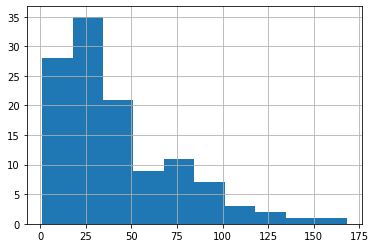

In [24]:
#histogram of ozone
data_cleaned3['Ozone'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x20e9ebc5100>,
 'caps': [<matplotlib.lines.Line2D at 0x20e9ebc5640>,
 'boxes': [<matplotlib.lines.Line2D at 0x20e9ebb0e20>],
 'medians': [<matplotlib.lines.Line2D at 0x20e9ebc5b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x20e9ebc5e20>],
 'means': []}

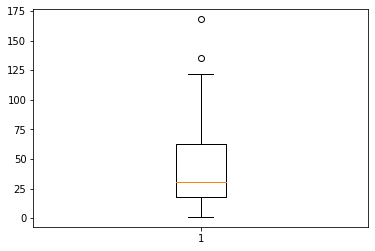

In [25]:
#box plot of Ozone Variable
data_box=data_cleaned3.dropna()
data1_box=data_box.Ozone
plt.boxplot(data1_box)

# Conclusion
Distribuion of Ozone variable is positively skewed becoz few datapoints are far away from maximum values as per IQR

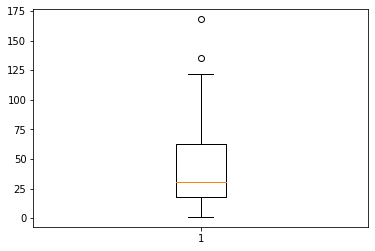

In [26]:
box=plt.boxplot(data1_box) #ozone box plot


In [27]:
import scipy.stats as stats
[item.get_ydata() for item in box['fliers']] #fliers are outliers

C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[array([135., 168.])]

In [28]:
#To get the whiskers
[item.get_ydata()[1] for item in box['whiskers']] #gives whiskers range min and max value



[1.0, 122.0]

In [29]:
data1_box.describe()

count    110.000000
mean      42.281818
std       33.269854
min        1.000000
25%       18.000000
50%       30.500000
75%       62.500000
max      168.000000
Name: Ozone, dtype: float64

# Observation
Distribuion of Ozone variable is positively skewed becoz few datapoints are far away from maximum values as per IQR that values are 135 and 168
most of the data points in Ozone Variables comes under 62.

{'whiskers': [<matplotlib.lines.Line2D at 0x20e9fa34b50>,
 'caps': [<matplotlib.lines.Line2D at 0x20e9fa43040>,
 'boxes': [<matplotlib.lines.Line2D at 0x20e9fa348b0>],
 'medians': [<matplotlib.lines.Line2D at 0x20e9fa43580>],
 'fliers': [<matplotlib.lines.Line2D at 0x20e9fa43820>],
 'means': []}

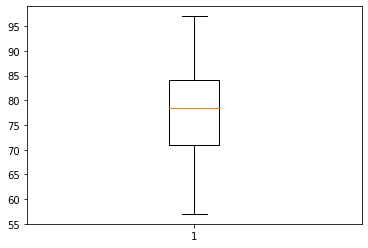

In [30]:
#box plot for Temp

data_box=data_cleaned3.dropna()
data1_box=data_box.Temp
plt.boxplot(data1_box)

In [31]:
data_cleaned3.columns

Index(['Ozone', 'Solar', 'Wind', 'Temp C', 'Month', 'Day', 'Year', 'Temp',
       'Weather'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x20e9fab82b0>,
 'caps': [<matplotlib.lines.Line2D at 0x20e9fab8820>,
 'boxes': [<matplotlib.lines.Line2D at 0x20e9faaafd0>],
 'medians': [<matplotlib.lines.Line2D at 0x20e9fab8d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x20e9fab8fa0>],
 'means': []}

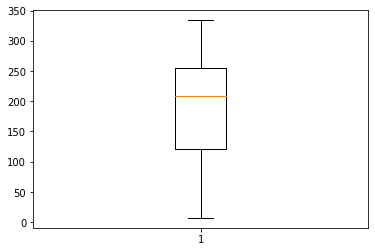

In [32]:
#box plot
data_box=data_cleaned3.dropna()
data1_box=data_box.Solar
plt.boxplot(data1_box)

{'whiskers': [<matplotlib.lines.Line2D at 0x20e9fb23cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x20e9fb35250>,
 'boxes': [<matplotlib.lines.Line2D at 0x20e9faf6ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x20e9fb357c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20e9fb35a60>],
 'means': []}

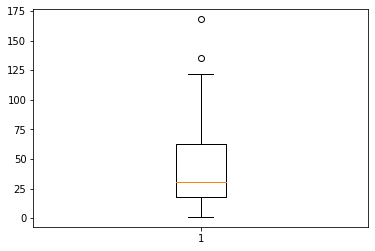

In [33]:
#box plot
data_box=data_cleaned3.dropna()
data1_box=data_box.Ozone
plt.boxplot(data1_box)

{'whiskers': [<matplotlib.lines.Line2D at 0x20e9fba90d0>,
 'caps': [<matplotlib.lines.Line2D at 0x20e9fb80370>,
 'boxes': [<matplotlib.lines.Line2D at 0x20e9fb9adf0>],
 'medians': [<matplotlib.lines.Line2D at 0x20e9fba9700>],
 'fliers': [<matplotlib.lines.Line2D at 0x20e9fba99a0>],
 'means': []}

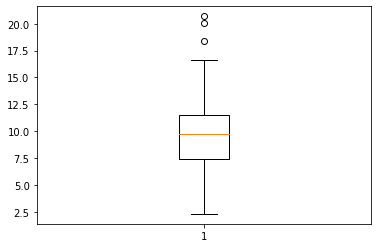

In [34]:
#box plot
data_box=data_cleaned3.dropna()
data1_box=data_box.Wind
plt.boxplot(data1_box)

{'whiskers': [<matplotlib.lines.Line2D at 0x20e9fc22040>,
 'caps': [<matplotlib.lines.Line2D at 0x20e9fc22460>,
 'boxes': [<matplotlib.lines.Line2D at 0x20e9fc13d60>],
 'medians': [<matplotlib.lines.Line2D at 0x20e9fc229a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20e9fc22c40>],
 'means': []}

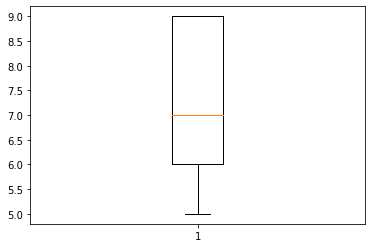

In [35]:
#box plot
data_box=data_cleaned3.dropna()
data1_box=data_box.Month
plt.boxplot(data1_box)

{'whiskers': [<matplotlib.lines.Line2D at 0x20e9fc936a0>,
 'caps': [<matplotlib.lines.Line2D at 0x20e9fc93be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20e9fc93400>],
 'medians': [<matplotlib.lines.Line2D at 0x20e9fca7160>],
 'fliers': [<matplotlib.lines.Line2D at 0x20e9fca7400>],
 'means': []}

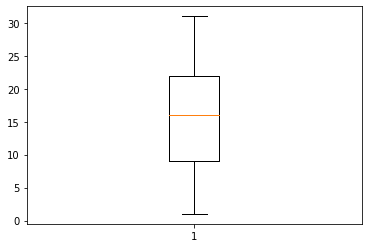

In [36]:
#box plot
data_box=data_cleaned3.dropna()
data1_box=data_box.Day
plt.boxplot(data1_box)

{'whiskers': [<matplotlib.lines.Line2D at 0x20e9fd03f10>,
 'caps': [<matplotlib.lines.Line2D at 0x20e9fd12490>,
 'boxes': [<matplotlib.lines.Line2D at 0x20e9fd03c70>],
 'medians': [<matplotlib.lines.Line2D at 0x20e9fd129d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20e9fd12c70>],
 'means': []}

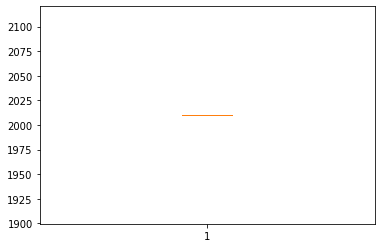

In [37]:
#box plot
data_box=data_cleaned3.dropna()
data1_box=data_box.Year
plt.boxplot(data1_box)

#   Analysis Weather hence it is categorical data
    

<Axes: >

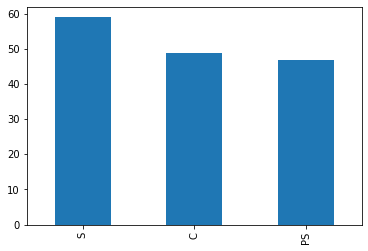

In [38]:
#bar plot
import matplotlib as plt
data['Weather'].value_counts().plot(kind='bar')


<Axes: ylabel='Weather'>

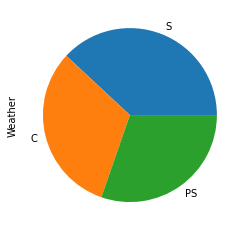

In [39]:
data['Weather'].value_counts().plot(kind='pie')

In [40]:
data_cleaned3[data_cleaned3.isna().any(axis=1)].head()

,Ozone,Solar,Wind,Temp C,Month,Day,Year,Temp,Weather
4,NaN,NaN,14.3,56.0,5.0,5,2010,56,S
5,28.0,NaN,14.9,66.0,5.0,6,2010,66,C
9,NaN,194.0,8.6,69.0,5.0,10,2010,69,S
10,7.0,NaN,6.9,NaN,5.0,11,2010,74,C
23,32.0,92.0,12.0,61.0,NaN,24,2010,61,C


In [41]:
data_cleaned3[data_cleaned3.isnull().any(axis=1)].shape

(46, 9)

In [42]:
data_cleaned3.isna().sum()

Ozone      38
Solar       7
Wind        0
Temp C      1
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

<Axes: >

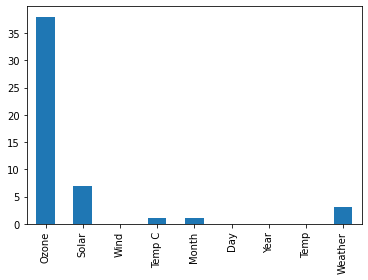

In [43]:
data_cleaned3.isnull().sum().plot(kind='bar')


In [44]:
#mean imputation
mean=data_cleaned3.Ozone.mean()
mean

42.016949152542374

In [45]:
data_cleaned3['Ozone']=data_cleaned3['Ozone'].fillna(mean)
data_cleaned3.Ozone.isna().sum() #noe check for missing value in Ozone Col

0

In [46]:
#Missing value imputation for Categorical value
#get the object columns
obj_columns=data_cleaned3[['Weather']]

In [47]:
obj_columns.isnull().sum()

Weather    3
dtype: int64

In [48]:
obj_columns.mode().iloc[0]

Weather    S
Name: 0, dtype: category
Categories (3, object): ['C', 'PS', 'S']

In [49]:
#missing value imputation for categorical value
obj_columns=obj_columns.fillna(obj_columns.mode().iloc[0]) #fiiling missing values mode in categorical values

In [50]:
data_cleaned3.isnull().sum()


Ozone      0
Solar      7
Wind       0
Temp C     1
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

# Scatter and Correlation analysis

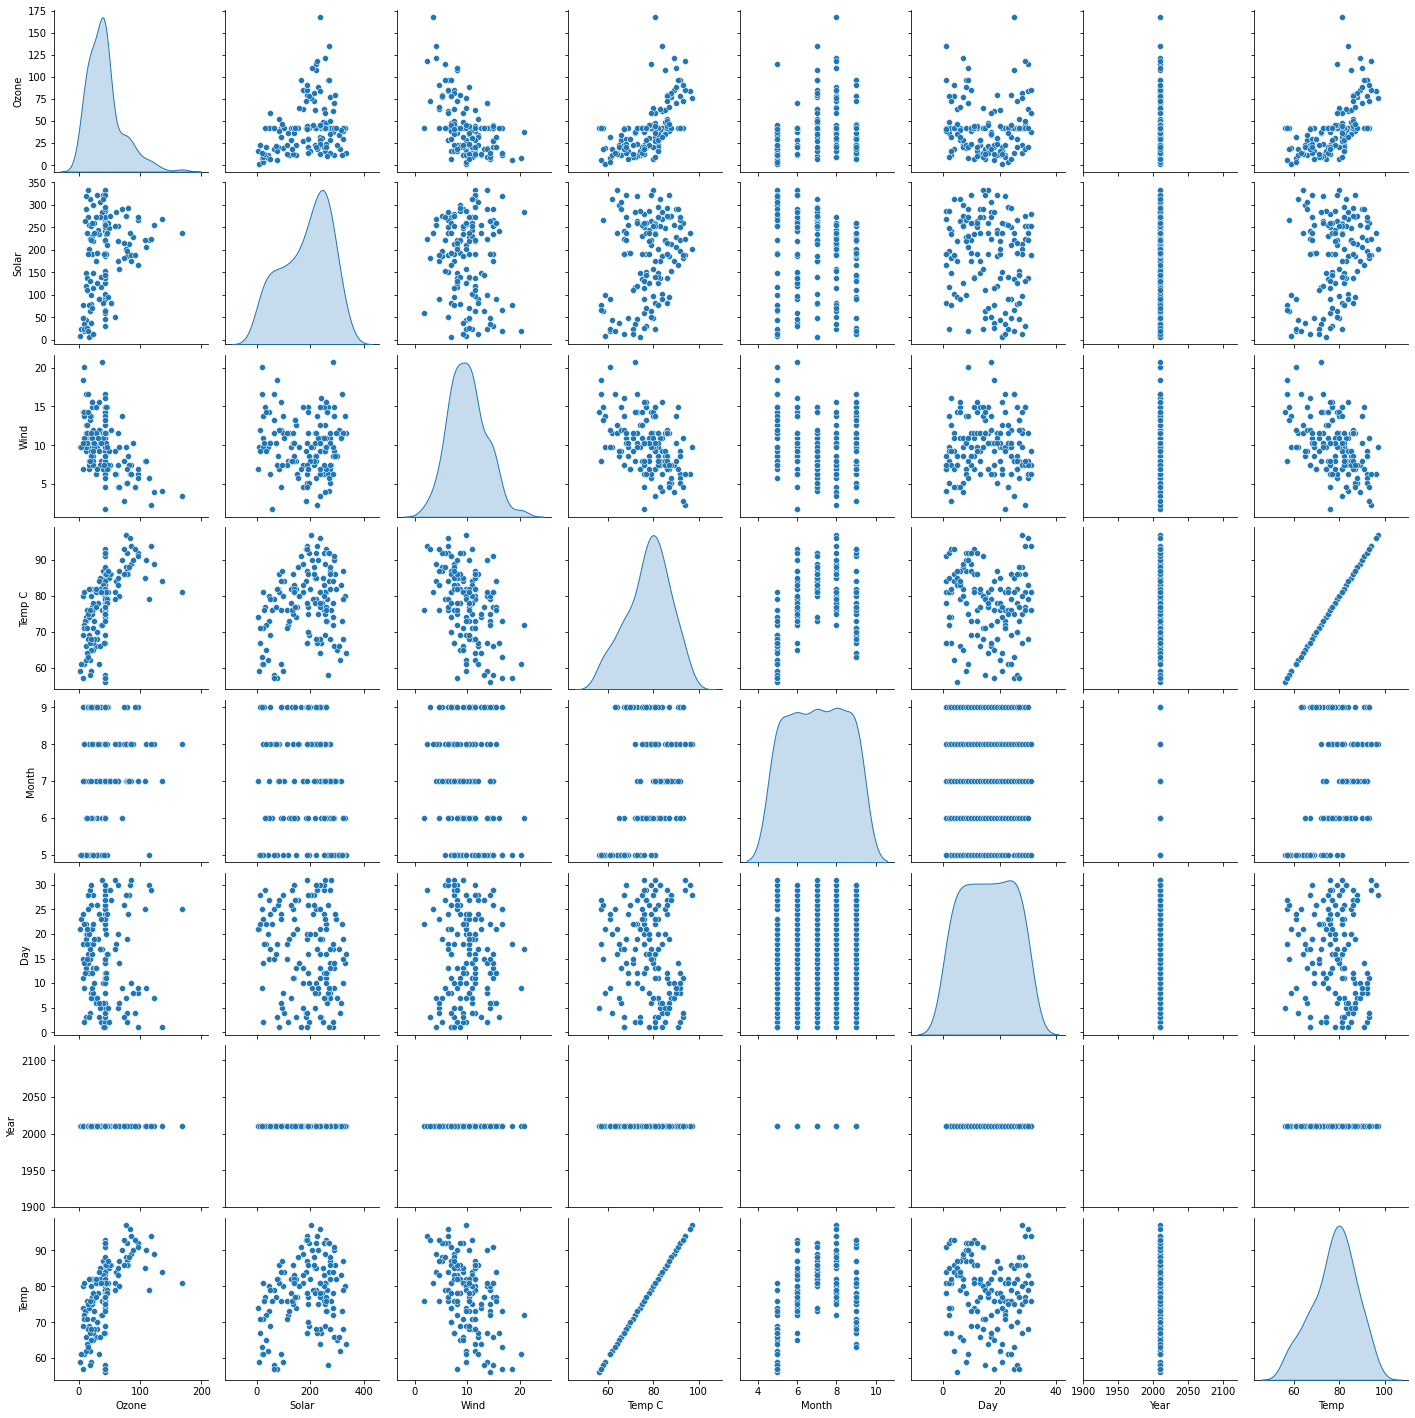

In [51]:
import seaborn as sns
#create the default pairplot
sns.pairplot(data_cleaned3, diag_kind='kde')

In [52]:
#Correlation
data_cleaned3.corr() #by default we used pearson method

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9696\2009186171.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_cleaned3.corr() #by default we used pearson method


,Ozone,Solar,Wind,Temp C,Month,Day,Year,Temp
Ozone,1.000000,0.306412,-0.524494,0.607094,0.140815,-0.013958,NaN,0.606969
Solar,0.306412,1.000000,-0.059879,0.273060,-0.088959,-0.150994,NaN,0.273060
Wind,-0.524494,-0.059879,1.000000,-0.445924,-0.162498,0.035350,NaN,-0.442369
Temp C,0.607094,0.273060,-0.445924,1.000000,0.401872,-0.123476,NaN,1.000000
Month,0.140815,-0.088959,-0.162498,0.401872,1.000000,0.037485,NaN,0.402826
Day,-0.013958,-0.150994,0.035350,-0.123476,0.037485,1.000000,NaN,-0.121894
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temp,0.606969,0.273060,-0.442369,1.000000,0.402826,-0.121894,NaN,1.000000


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9696\936506814.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data_cleaned3.corr()


<Axes: >

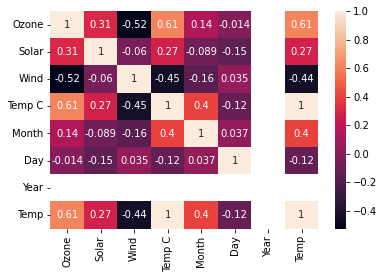

In [53]:
#calculate the Correlation matrix
corr=data_cleaned3.corr()
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='Blues', annot=True)
#plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, linecolor='Green', annot=True)

# Transformation 

In [ ]:
#creating dummy variable for Weather column
#we are converting categorical data Weather to numerical
#we are doing with now original data
data_cleaned4=pd.get_dummies(data, columns=['Weather'], drop_first =True)  #we drop the first dummy var i.e. Weather_c
data_cleaned4

In [31]:
data_cleaned4=pd.get_dummies(data, columns=['Weather'])
data_cleaned4

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather_C,Weather_PS,Weather_S
1,41.0,190.0,7.4,67.0,5.0,1,2010,67,0,0,1
2,36.0,118.0,8.0,72.0,5.0,2,2010,72,1,0,0
3,12.0,149.0,12.6,74.0,5.0,3,2010,74,0,1,0
4,18.0,313.0,11.5,62.0,5.0,4,2010,62,0,0,1
5,NaN,NaN,14.3,56.0,5.0,5,2010,56,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
154,41.0,190.0,7.4,67.0,5.0,1,2010,67,1,0,0
155,30.0,193.0,6.9,70.0,9.0,26,2010,70,0,1,0
156,NaN,145.0,13.2,77.0,9.0,27,2010,77,0,0,1
157,14.0,191.0,14.3,75.0,9.0,28,2010,75,0,0,1


# Normalization of the data

In [32]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [34]:
data_cleaned4.values

array([[ 41. , 190. ,   7.4, ...,   0. ,   0. ,   1. ],
       [ 36. , 118. ,   8. , ...,   1. ,   0. ,   0. ],
       [ 12. , 149. ,  12.6, ...,   0. ,   1. ,   0. ],
       ...,
       [  nan, 145. ,  13.2, ...,   0. ,   0. ,   1. ],
       [ 14. , 191. ,  14.3, ...,   0. ,   0. ,   1. ],
       [ 18. , 131. ,   8. , ...,   1. ,   0. ,   0. ]])

In [41]:
array=data_cleaned4.values

scaler=MinMaxScaler(feature_range=(0,1))
rescaledX=scaler.fit_transform(array)

#transformed data
rescaledX


array([[0.23952096, 0.55963303, 0.3       , ..., 0.        , 0.        ,
        1.        ],
       [0.20958084, 0.33944954, 0.33157895, ..., 1.        , 0.        ,
        0.        ],
       [0.06586826, 0.43425076, 0.57368421, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [       nan, 0.42201835, 0.60526316, ..., 0.        , 0.        ,
        1.        ],
       [0.07784431, 0.56269113, 0.66315789, ..., 0.        , 0.        ,
        1.        ],
       [0.10179641, 0.37920489, 0.33157895, ..., 1.        , 0.        ,
        0.        ]])

# Standardrization

In [44]:
#standardize data (0 mean, 1 SD)
from sklearn.preprocessing import StandardScaler

In [45]:
scaler=StandardScaler()
rescaledX=scaler.fit_transform(data_cleaned4)
rescaledX[0:2,:]

array([[-0.01795728,  0.0519743 , -0.73071387, -1.14706581, -1.43058584,
        -1.67319835,  0.        , -1.14759017, -0.6704784 , -0.65070994,
         1.29536331],
       [-0.17187682, -0.7622398 , -0.55929176, -0.61362584, -1.43058584,
        -1.56169884,  0.        , -0.61272513,  1.49147236, -0.65070994,
        -0.77198419]])

# Speed up EDA Process

In [48]:
!pip install pandas-profiling==2.7.1
!pip install sweetviz

In [50]:
import pandas_profiling as pp


In [56]:
EDA_report=pp.ProfileReport(data)
EDA_report.to_file(output_file='report.html') #it will generate a report which will be store at your jupyter note book and 
                                                #it will have all the info which we obtain from writing after multiple line of 
                                                # code without Speed up EDA process

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

ImportError: cannot import name 'ABCIndexClass' from 'pandas.core.dtypes.generic' (C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\dtypes\generic.py)

In [71]:
import sweetviz as sv
sweet_report=sv.analyze(data)
sweet_report.show_html('csv_report.html') #file name is user defined u can change html file name acc. to u

                                             |          | [  0%]   00:00 -> (? left)

Report csv_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#  Dtale Package

In [62]:
!pip install dtale


In [60]:
import dtale

In [64]:
dtale.show(data) #here data is our orginal data which was intially assigned

C:\Users\Lenovo\anaconda3\lib\site-packages\dtale\views.py:725: FutureWarning:

['Weather'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



In [69]:
np.__version__   #check the version of numpy
#!pip install --upgrade numpy #To upgrade the numpy

'1.21.5'